<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [4]:
sac = pd.read_csv(sac_csv, index_col='sale_date')

In [5]:
# sac.groupby('sq__ft').count()

In [6]:
# select only sqfts that are less than 500
mask = sac['sq__ft'] < 500
# apply to sqft column
column_name = 'sq__ft'
# replace values less than 500 with the mean of columns that greater than 500
sac.loc[mask, column_name] = sac.loc[sac.loc[:,'sq__ft'] > 500,'sq__ft'].median()

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [7]:
sac.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,-0.060348,-0.095918,-0.039842,0.016949
beds,0.125319,1.000000,0.839650,0.466742,0.344752,0.038315,-0.048107
baths,0.069165,0.839650,1.000000,0.537069,0.416718,0.020946,-0.027232
sq__ft,-0.060348,0.466742,0.537069,1.000000,0.531778,0.003819,-0.005739
price,-0.095918,0.344752,0.416718,0.531778,1.000000,0.100806,-0.094262
latitude,-0.039842,0.038315,0.020946,0.003819,0.100806,1.000000,-0.998927
longitude,0.016949,-0.048107,-0.027232,-0.005739,-0.094262,-0.998927,1.000000


In [11]:
c = sac.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

topVars = pd.DataFrame(so.loc[so < 1].head(7))

In [133]:
# retrieve the top correllated vars
topLabels = []
for row in topVars.index:
    for item in row:
        if item in ['latitude', 'longitude']:
            continue
        if item in topLabels:
            continue
        else:
            topLabels.append(item)

print(topLabels)

['baths', 'beds', 'sq__ft', 'price']


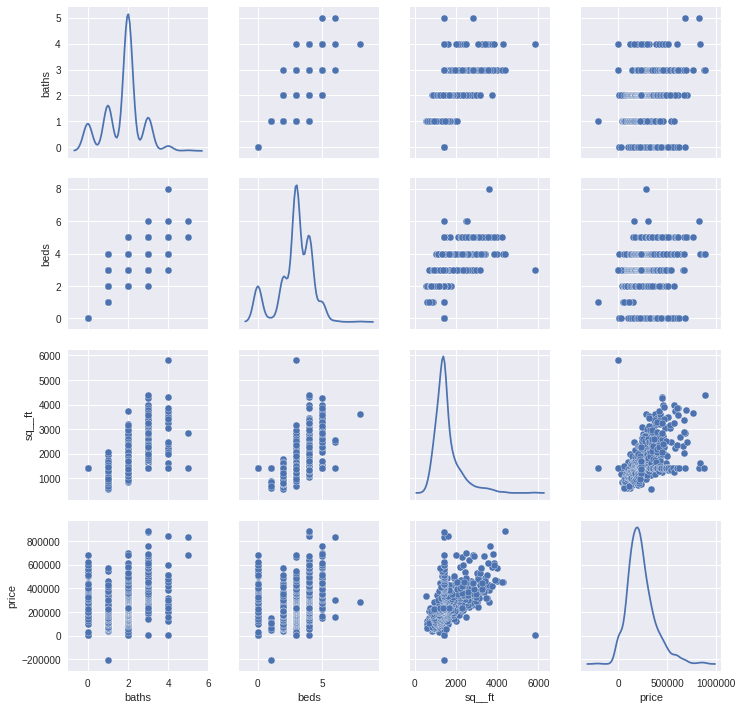

In [13]:
sns.pairplot(sac.loc[:,topLabels], diag_kind='kde')

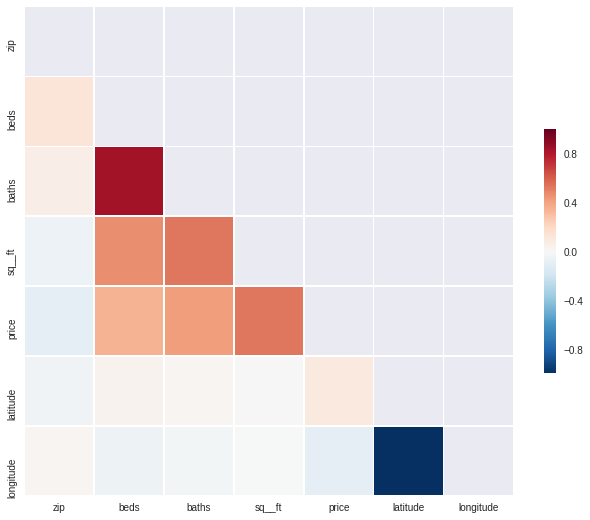

In [24]:
# Generate a mask for the upper triangle
mask = np.zeros_like(sac.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sac.corr(), mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [69]:
# create a corr matrix and sort desc, select price, eliminate price/price comparison
foo = sac.corr().abs().unstack()
foo['price'][~foo['price'].index.isin(['price'])].sort_values(ascending=False)

sq__ft       0.531778
baths        0.416718
beds         0.344752
latitude     0.100806
zip          0.095918
longitude    0.094262
dtype: float64

In [132]:
print('{} is best predictor with score of {}'
      .format(foo['price'][~foo['price'].index.isin(['price'])].sort_values(ascending=False).index[0],
              round(float(foo['price'][~foo['price'].index.isin(['price'])].sort_values(ascending=False)[0]),3)))

sq__ft is best predictor with score of 0.532


### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
lm = LinearRegression()

In [147]:
X = sac.as_matrix(['beds', 'baths', 'sq__ft'])
y = sac.as_matrix(['price'])

In [154]:
X_train = X[:800,:]
y_train = y[:800,:]
X_test = X[801:,:]
y_test = y[801:,:]

In [164]:
model = lm.fit(X_train, y_train)

In [167]:
predictions  =  model.predict(X_test)
score        =  model.score(X_test, y_test)

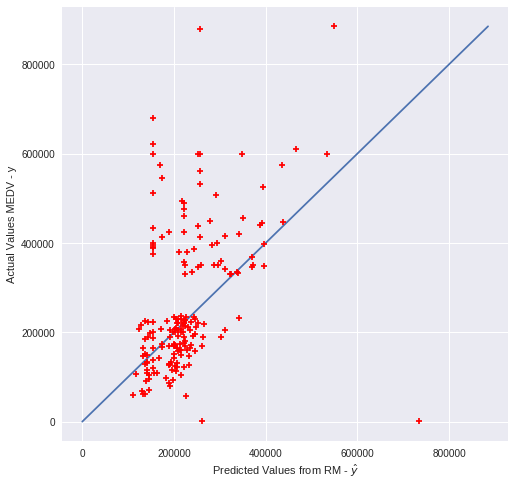

score:  0.098920238513


In [170]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")

plt.plot([0, np.max(y_test)], [0, np.max(y_test)])

plt.show()

print("score: ", score)

### 6. Interpret the intercept. Interpret the slope.

In [172]:
# slope of 3 factors
print(model.coef_)
# intercept
print(model.intercept_)

[[ -3880.60024773  39513.30427852     98.42533234]]
[ 13830.58228758]


### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A: I have no idea.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: